# Assignment 3: Solving Traveling Salesman Problem using Simulated Annealing

## Basic imports and functions(class Temperature,calculate_total_distance,simulated_annealing)

In [445]:
import random
import math
import numpy as np

class Temperature:
    def __init__(self, f, parameters):
        self.updatefunction = f
        self.parameters = parameters
        self.current_temp = parameters["initial_temp"]
        self.iter = 1  #Initialize iteration counter

    def update_temperature(self):
        """Method to update temperature"""
        self.current_temp = self.updatefunction(self.current_temp, self.iter, self.parameters)
        self.iter += 1


def calculate_total_distance(cities, route):
    """Calculate the total distance for a given route"""
    total_distance = 0
    number_of_cities = len(cities)

    for i in range(number_of_cities):
        # Calculate the distance between adjacent cities
        city1 = cities[route[i % number_of_cities]]
        city2 = cities[route[(i + 1) % number_of_cities]]
        distance = math.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)
        total_distance += distance
        
    return total_distance

def simulated_annealing(cities, Optimize_function, Cooling_fuction, parameters):
    """Simulated annealing algorithm main function"""

    # Randomly initialize a solution (route)
    current_route = list(range(len(cities)))
    random.shuffle(current_route)

    current_distance = calculate_total_distance(cities, current_route)
    temper = Temperature(Cooling_fuction, parameters)
    distance_iter = []
    temper_iter = []
    while temper.iter < parameters["max_iter"]:
        for _ in range(parameters["markov_chain_length"]):
            # Generate new solution
            
            new_route = Optimize_function(current_route)
            new_distance = calculate_total_distance(cities, new_route)

            # Determine whether to accept the new solution
            if new_distance < current_distance or random.random() < math.exp((current_distance - new_distance) / temper.current_temp):
            #if new_distance < current_distance:
                current_route = new_route
                current_distance = new_distance
        distance_iter.append((temper.iter,current_distance))     
        temper_iter.append((temper.iter,temper.current_temp))    
        temper.update_temperature()

    print(temper.iter)
    print(temper.current_temp)
    return current_route, current_distance, distance_iter, temper_iter

## Cooling functions

In [446]:
def Geometric_cooling(current_temp, iter, parameters):
    return current_temp * parameters["cooling_rate"]

def Linear_cooling(current_temp, iter, parameters):
    return current_temp - parameters["initial_temp"] / parameters["max_iter"]

def Logarithmic_cooling(current_temp, iter, parameters):
    return parameters["a"] / (1 + 2 * np.log(1 + iter))

def Basic_cooling(current_temp, iter, parameters):
    return parameters["a"] / np.log(iter + parameters["b"])

## Optimizing route functions

In [447]:
def two_opt_swap(route):
    """Applies 2-opt swapping on the given route between cities i and k"""
    i, k = sorted(random.sample(range(1, len(route)), 2))
    new_route = route[0:i]
    new_route.extend(reversed(route[i:k + 1]))
    new_route.extend(route[k + 1:])
    return new_route

def move_node(route):
    """
    Move a city to a new position in the route.

    :param route: List of cities representing the current route.
    :param node_index: Index of the city to be moved.
    :param new_position: New position where the city will be moved.
    :return: New route with the city moved to the new position.
    """
    i, k = random.sample(range(1, len(route)), 2)
    city = route.pop(i)  # Remove the city from its current position
    route.insert(k, city)  # Insert the city at the new position
    return route



## read_tsp_file

In [448]:
# First, read the uploaded file eil51.tsp.txt
file_path = 'plots/a280.tsp.txt'

# Define a function to read TSP files and parse city coordinates
def read_tsp_file(file_path):
    cities = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.split()
            if len(parts) == 3 and parts[0].isdigit():
                cities.append((float(parts[1]), float(parts[2])))
    return cities

# Call the function and read the city coordinates
cities = read_tsp_file(file_path)

## Run test

In [449]:
initial_temp = 20
cooling_rate = 0.995
max_iter = 1000
markov_chain_length = 1000
parameters_Geometric_cooling = {"cooling_method_name" : "Geometric_cooling",
                                "initial_temp" : initial_temp, 
                                "max_iter": max_iter,
                                "markov_chain_length":markov_chain_length, 
                                "cooling_rate": cooling_rate}

parameters_Linear_cooling = {"cooling_method_name" : "Linear_cooling",
                                "initial_temp" : initial_temp, 
                                "max_iter": max_iter,
                                "markov_chain_length":markov_chain_length, 
                                "cooling_rate": cooling_rate}

parameters_Logarithmic__cooling = {"cooling_method_name" : "Logarithmic__cooling",
                                "initial_temp" : initial_temp, 
                                "max_iter": max_iter,
                                "markov_chain_length":markov_chain_length, 
                                "a" : initial_temp, 
                                "cooling_rate": cooling_rate}

parameters_Basic_cooling = {"cooling_method_name" : "Basic_cooling",
                            "initial_temp" : initial_temp, 
                            "max_iter": max_iter,
                            "markov_chain_length":markov_chain_length, 
                            "a" : initial_temp, 
                            "b" : 5}

cooling_functions = [
    (Geometric_cooling, parameters_Geometric_cooling),
    #(Basic_cooling, parameters_Basic_cooling),
    (Linear_cooling, parameters_Linear_cooling),
    (Logarithmic_cooling, parameters_Logarithmic__cooling)
]

optimal_routes = []
optimal_distances = []
cooling_method_names = []
distance_iters = []
temper_iters = []

for cooling_function, parameters in cooling_functions:
    optimal_route, optimal_distance, distance_iter, temper_iter = simulated_annealing(cities, two_opt_swap, cooling_function, parameters)
    optimal_routes.append(optimal_route)
    optimal_distances.append(optimal_distance)
    cooling_method_names.append(parameters["cooling_method_name"])
    distance_iters.append(distance_iter)
    temper_iters.append(temper_iter)
    print("Optimal Route:", optimal_route)
    print("Optimal Distance:", optimal_distance)
    print()

1000
0.1337481121373261
Optimal Route: [44, 43, 58, 61, 62, 63, 65, 64, 85, 84, 83, 86, 112, 111, 87, 82, 81, 80, 88, 108, 89, 79, 78, 77, 76, 74, 75, 73, 72, 71, 70, 69, 66, 68, 67, 57, 56, 55, 54, 46, 53, 52, 51, 50, 49, 48, 47, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 124, 123, 122, 125, 28, 27, 26, 25, 21, 24, 22, 23, 13, 15, 270, 271, 14, 12, 11, 10, 9, 7, 6, 5, 4, 276, 275, 8, 274, 273, 272, 260, 261, 262, 257, 258, 259, 277, 278, 3, 2, 279, 0, 1, 241, 242, 240, 239, 238, 237, 236, 235, 234, 233, 232, 231, 230, 245, 229, 250, 249, 246, 244, 243, 247, 248, 254, 255, 256, 253, 252, 251, 208, 209, 210, 228, 227, 226, 225, 224, 223, 222, 218, 221, 220, 219, 216, 215, 217, 214, 213, 212, 211, 206, 207, 205, 204, 203, 202, 201, 200, 197, 196, 195, 194, 193, 192, 191, 190, 189, 185, 184, 186, 188, 187, 164, 163, 162, 161, 183, 182, 181, 180, 179, 178, 175, 176, 150, 177, 149, 148, 147, 146, 145, 144, 198, 199, 143, 142, 141, 140, 138, 139, 264, 263, 265, 137, 136, 266, 267, 135, 134,

## Visualization part

In [450]:
import matplotlib.pyplot as plt

def plot_tsp_solution(cities, route, cooling_method_name):
    """Drawing a solution to the traveling salesman problem"""
    plt.figure(figsize=(10, 6))

    # Extract and draw city coordinates
    x = [city[0] for city in cities]
    y = [city[1] for city in cities]
    plt.scatter(x, y, color='blue')

    #Add city label
    for i, city in enumerate(cities):
        plt.text(city[0], city[1], str(i), fontsize=9, ha='right', va='bottom')

    # Draw path
    for i in range(len(route)):
        start_city = cities[route[i]]
        end_city = cities[route[(i + 1) % len(route)]]
        plt.plot([start_city[0], end_city[0]], [start_city[1], end_city[1]], color='red')

    plt.title(f'TSP Solution, {cooling_method_name}')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.show()

def cooling_function_compare(cooling_method_names, parameter_iters, parameter_name):
    """
    Function to compare different cooling methods for simulated annealing.
    
    Parameters:
    cooling_method_names (list): A list of names of the cooling methods.
    distance_iters (list): A list of tuples/lists containing iteration-distance pairs for each cooling method.
    """
    plt.figure(figsize=(10, 6))
    
    # Iterate over the provided cooling methods and distance-iteration data
    for method_name, dist_iter in zip(cooling_method_names, parameter_iters):
        # Unpack the iteration and distance data
        iters, distances = zip(*dist_iter)
        
        # Plot the data with a label for the legend
        plt.plot(iters, distances, label=method_name)
    
    # Add title and labels
    plt.title('Cooling Function Comparison')
    plt.xlabel('K (iterations)')
    plt.ylabel(f'{parameter_name}')
    plt.legend(title='Cooling Schedules')
    plt.grid(True)
    
    # Display the plot
    plt.show()

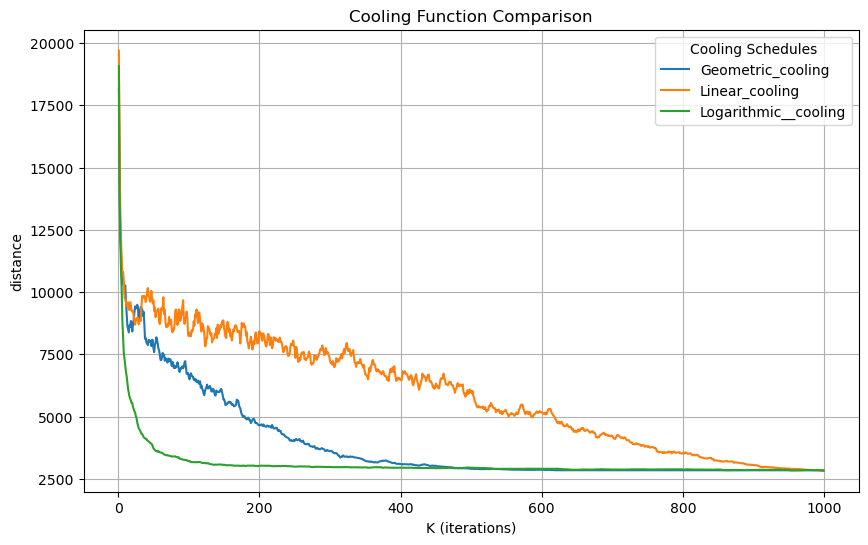

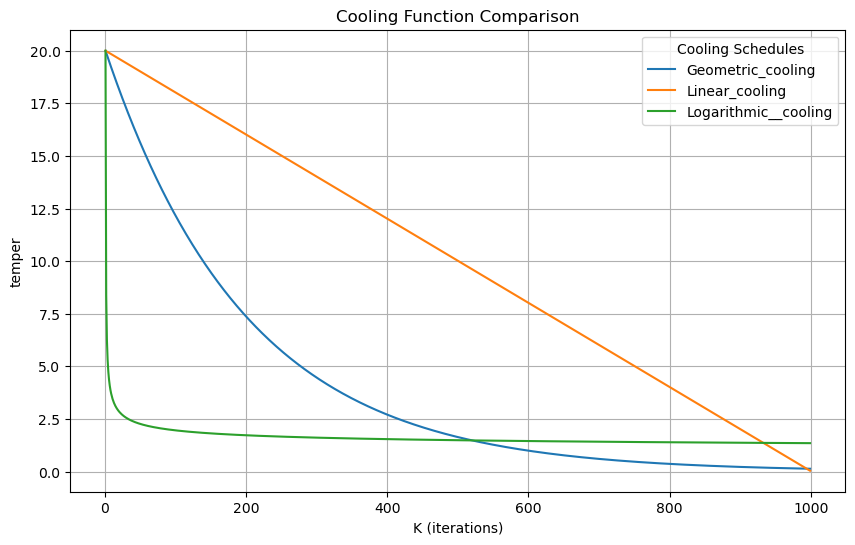

In [451]:
cooling_function_compare(cooling_method_names, distance_iters, "distance")
cooling_function_compare(cooling_method_names, temper_iters, "temper")

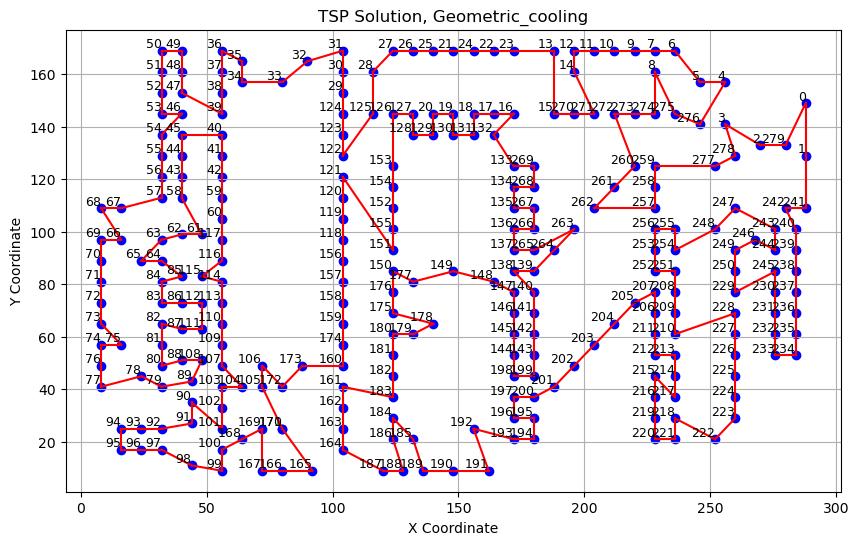

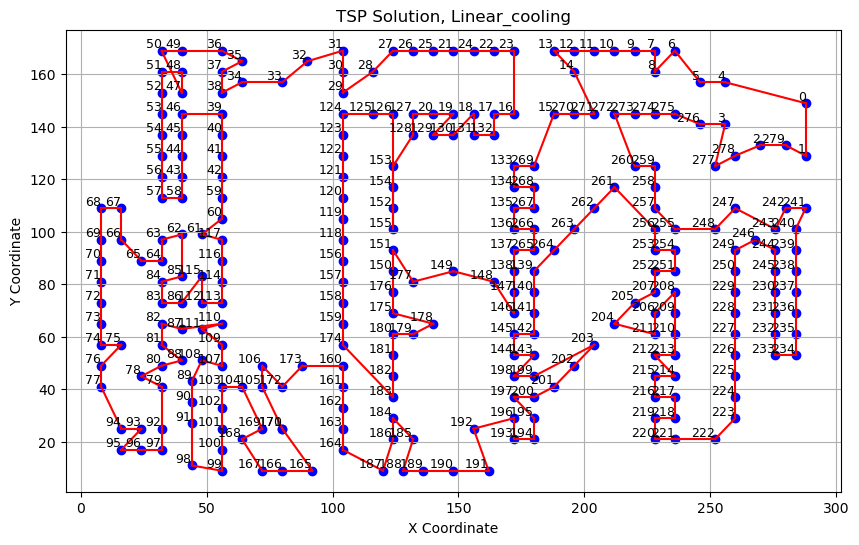

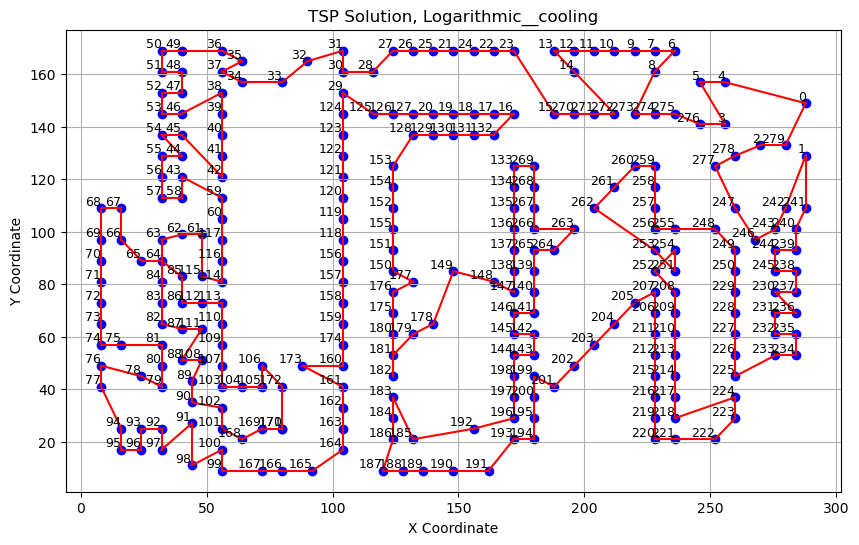

In [453]:
# Draw the solution using the optimal path and city coordinates found previously
for optimal_route, cooling_method_name in zip(optimal_routes, cooling_method_names):
    plot_tsp_solution(cities, optimal_route, cooling_method_name)

## Test Reheating

### Get current_route

In [458]:
current_route_test = optimal_routes[0]

### reheat

In [466]:
def simulated_annealing(current_route, cities, Optimize_function, Cooling_fuction, parameters):
    """Simulated annealing algorithm main function"""

    current_distance = calculate_total_distance(cities, current_route)
    temper = Temperature(Cooling_fuction, parameters)
    distance_iter = []
    temper_iter = []
    while temper.iter < parameters["max_iter"]:
        for _ in range(parameters["markov_chain_length"]):
            # Generate new solution
            
            new_route = Optimize_function(current_route)
            new_distance = calculate_total_distance(cities, new_route)

            # Determine whether to accept the new solution
            #if new_distance < current_distance or random.random() < math.exp((current_distance - new_distance) / temper.current_temp):
            if new_distance < current_distance:
                current_route = new_route
                current_distance = new_distance
        distance_iter.append((temper.iter,current_distance))     
        temper_iter.append((temper.iter,temper.current_temp))    
        temper.update_temperature()

    print(temper.iter)
    print(temper.current_temp)
    return current_route, current_distance, distance_iter, temper_iter

In [472]:
initial_temp = 1
cooling_rate = 0.995
max_iter = 5000
markov_chain_length = 100
parameters_Geometric_cooling = {"cooling_method_name" : "Geometric_cooling",
                                "initial_temp" : initial_temp, 
                                "max_iter": max_iter,
                                "markov_chain_length":markov_chain_length, 
                                "cooling_rate": cooling_rate}

parameters_Linear_cooling = {"cooling_method_name" : "Linear_cooling",
                                "initial_temp" : initial_temp, 
                                "max_iter": max_iter,
                                "markov_chain_length":markov_chain_length, 
                                "cooling_rate": cooling_rate}

parameters_Logarithmic__cooling = {"cooling_method_name" : "Logarithmic__cooling",
                                "initial_temp" : initial_temp, 
                                "max_iter": max_iter,
                                "markov_chain_length":markov_chain_length, 
                                "a" : initial_temp, 
                                "cooling_rate": cooling_rate}

parameters_Basic_cooling = {"cooling_method_name" : "Basic_cooling",
                            "initial_temp" : initial_temp, 
                            "max_iter": max_iter,
                            "markov_chain_length":markov_chain_length, 
                            "a" : initial_temp, 
                            "b" : 5}

cooling_functions = [
    (Geometric_cooling, parameters_Geometric_cooling),
    #(Basic_cooling, parameters_Basic_cooling),
    (Linear_cooling, parameters_Linear_cooling),
    #(Logarithmic_cooling, parameters_Logarithmic__cooling)
]

optimal_routes = []
optimal_distances = []
cooling_method_names = []
distance_iters = []
temper_iters = []

for cooling_function, parameters in cooling_functions:
    optimal_route, optimal_distance, distance_iter, temper_iter = simulated_annealing(current_route_test, cities, two_opt_swap, cooling_function, parameters)
    optimal_routes.append(optimal_route)
    optimal_distances.append(optimal_distance)
    cooling_method_names.append(parameters["cooling_method_name"])
    distance_iters.append(distance_iter)
    temper_iters.append(temper_iter)
    print("Optimal Route:", optimal_route)
    print("Optimal Distance:", optimal_distance)
    print()

5000
1.3109334582851401e-11
Optimal Route: [44, 43, 58, 61, 62, 63, 65, 64, 85, 84, 83, 86, 112, 111, 87, 82, 81, 80, 88, 108, 89, 79, 78, 77, 76, 74, 75, 73, 72, 71, 70, 69, 66, 68, 67, 57, 56, 55, 54, 46, 53, 52, 51, 50, 49, 48, 47, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 124, 123, 122, 125, 28, 27, 26, 25, 21, 24, 22, 23, 13, 15, 270, 271, 14, 12, 11, 10, 9, 7, 6, 5, 4, 276, 275, 8, 274, 273, 272, 260, 261, 262, 257, 258, 259, 277, 278, 3, 2, 279, 0, 1, 241, 242, 240, 239, 238, 237, 236, 235, 234, 233, 232, 231, 230, 245, 229, 250, 249, 246, 244, 243, 247, 248, 254, 255, 256, 253, 252, 251, 208, 209, 210, 228, 227, 226, 225, 224, 223, 222, 218, 221, 220, 219, 216, 215, 217, 214, 213, 212, 211, 206, 207, 205, 204, 203, 202, 201, 200, 197, 196, 195, 194, 193, 192, 191, 190, 189, 185, 184, 186, 188, 187, 164, 163, 162, 161, 183, 182, 181, 180, 179, 178, 175, 176, 150, 177, 149, 148, 147, 146, 145, 144, 198, 199, 143, 142, 141, 140, 138, 139, 264, 263, 265, 137, 136, 266, 267, 135, 

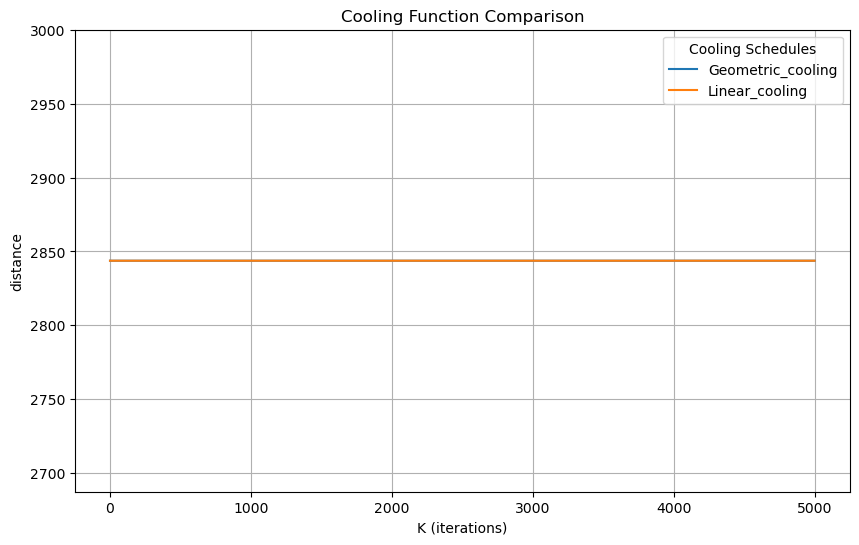

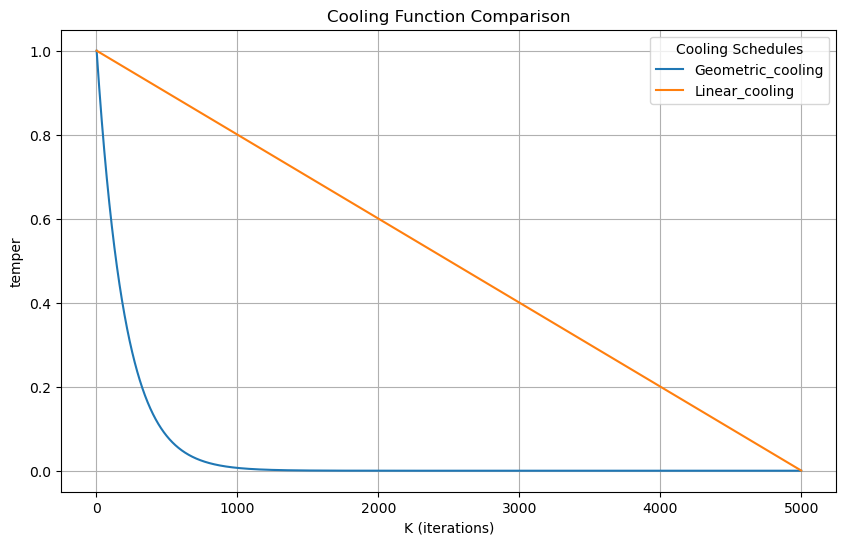

In [473]:
cooling_function_compare(cooling_method_names, distance_iters, "distance")
cooling_function_compare(cooling_method_names, temper_iters, "temper")